<a href="https://colab.research.google.com/github/AmitraksharChakraborty/ML_PROJECTS_2024/blob/main/HateSpeech_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraryes..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataset= pd.read_csv('labeled_data.csv')
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
dataset.isnull()
dataset.isnull().sum()


,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [ ]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [ ]:
dataset['labels']=dataset['class'].map({0:'hate_speech',
                                        1:'offensive_language',
                                        2:'no hate and no offensive'})
dataset


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,no hate and no offensive
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive_language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",no hate and no offensive
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,offensive_language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,offensive_language


In [ ]:
data=dataset[["tweet","labels"]]
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,no hate and no offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive_language
24779,"you've gone and broke the wrong heart baby, an...",no hate and no offensive
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive_language
24781,youu got wild bitches tellin you lies,offensive_language


In [ ]:
import nltk
import re #reguler expressions
from nltk.corpus import stopwords # stop words like the,have etc.
from nltk.stem import WordNetLemmatizer
import string
# Download the 'stopwords' dataset
nltk.download('stopwords')
stopwords=stopwords.words("english")
StemmerI=nltk.SnowballStemmer('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#data cleaning
def clean_data(text):
  text= str(text).lower()
  text=re.sub('https?://\S+|www\.S+', '', text)
  text=re.sub('\[.*?\]', '', text)
  text=re.sub('<.*?>+', '', text)
  text=re.sub('[%s]' %re.escape(string.punctuation),'', text)
  text=re.sub('\n','', text)
  text=re.sub('\w*\d\w*','', text)
  #stopwords removal
  text=[word for word in text.split(' ')if word not in stopwords]
  text=" ".join(text)
  #stemming the text
  text=[stemmer.stem(word)for word in text.split(' ')]
  text=" ".join(text)
  return text
  data

In [ ]:
import nltk
import re #reguler expressions
from nltk.corpus import stopwords # stop words like the,have etc.
from nltk.stem import WordNetLemmatizer
import string
# Download the 'stopwords' dataset
nltk.download('stopwords')
stopwords=stopwords.words("english")
StemmerI=nltk.SnowballStemmer('english')

#data cleaning
def clean_data(text):
  text= str(text).lower()
  text=re.sub('https?://\S+|www\.S+', '', text)
  text=re.sub('\[.*?\]', '', text)
  text=re.sub('<.*?>+', '', text)
  text=re.sub('[%s]' %re.escape(string.punctuation),'', text)
  text=re.sub('\n','', text)
  text=re.sub('\w*\d\w*','', text)
  #stopwords removal
  text=[word for word in text.split(' ')if word not in stopwords]
  text=" ".join(text)
  #stemming the text
  # Use StemmerI instead of stemmer
  text=[StemmerI.stem(word)for word in text.split(' ')]
  text=" ".join(text)
  return text
  data


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data["tweet"]=data["tweet"].apply(clean_data)

<ipython-input-44-7cdb172179f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]=data["tweet"].apply(clean_data)


In [ ]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,no hate and no offensive
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,offensive_language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,offensive_language
3,rt cganderson vivabas look like tranni,offensive_language
4,rt shenikarobert shit hear might true might f...,offensive_language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,offensive_language
24779,youv gone broke wrong heart babi drove redneck...,no hate and no offensive
24780,young buck wanna eat dat nigguh like aint fuck...,offensive_language
24781,youu got wild bitch tellin lie,offensive_language


In [ ]:
x=np.array(data["tweet"])
y=np.array(data["labels"])

In [ ]:
x

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
cv=CountVectorizer()
x=cv.fit_transform(x)


In [ ]:
x

<24783x25693 sparse matrix of type '<class 'numpy.int64'>'
	with 197861 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split

# The train_test_split function returns four values: x_train, x_test, y_train, y_test.
# To correctly capture all return values, you should unpack them using four variable names:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [ ]:
x_train

<16604x25693 sparse matrix of type '<class 'numpy.int64'>'
	with 132619 stored elements in Compressed Sparse Row format>

In [ ]:
#building ML models..
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.model_selection import train_test_split

    # Assuming 'x' contains your text data and 'y' your target variable
    # Replace with your actual data loading or definition
#x = ["This is a sample text.", "Another example text."]  # Example x data
#y = [0, 1]  # Example y data
#cv = CountVectorizer()
#x = cv.fit_transform(x)


In [ ]:
#building ML models..
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.model_selection import train_test_split

# Assuming 'x' contains your text data and 'y' your target variable
# Replace with your actual data loading or definition
#x = ["This is a sample text.", "Another example text."]  # Example x data
#y = [0, 1]  # Example y data
#cv = CountVectorizer()
#x = cv.fit_transform(x)

# Split data into training and testing sets
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) # This line is added to define x_train, x_test, y_train, y_test

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Corrected the spelling of 'DecisionTreeClassifier'










In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt.predict(x_test)

In [ ]:
#confusion Matrix and accuracy hre..
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[ 145,   35,  285],
       [  34, 1132,  213],
       [ 234,  214, 5887]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

<Axes: >

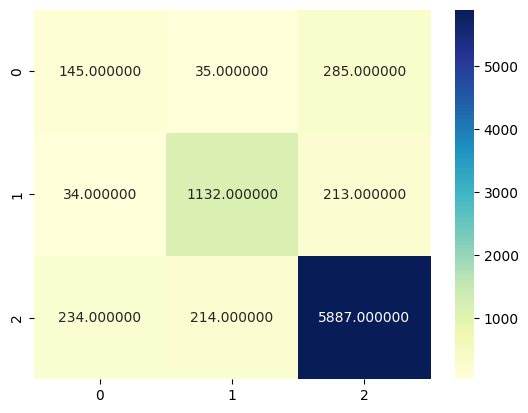

In [ ]:
sns.heatmap(cm, annot=True, fmt="f",cmap="YlGnBu")

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8759016994742633